In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report




In [5]:
# loading the data from csv file to a pandas Dataframe
raw_mail_data = pd.read_csv('/content/mail_data.csv')

In [6]:
print(raw_mail_data)

     Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [7]:
# replace the null values with a null string
mail_data = raw_mail_data.where((pd.notnull(raw_mail_data)),'')

In [8]:
# printing the first 5 rows of the dataframe
mail_data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
# checking the number of rows and columns in the dataframe
mail_data.shape

(5572, 2)

In [10]:
# label spam mail as 0;  ham mail as 1;

mail_data.loc[mail_data['Category'] == 'spam', 'Category',] = 0
mail_data.loc[mail_data['Category'] == 'ham', 'Category',] = 1

In [11]:
# separating the data as texts and label

X = mail_data['Message']

Y = mail_data['Category']

In [12]:
print(X)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object


In [13]:
print(Y)

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object


In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [15]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5572,)
(4457,)
(1115,)


In [16]:
# transform the text data to feature vectors that can be used as input to the Logistic regression

feature_extraction = TfidfVectorizer(min_df = 1, stop_words='english', lowercase=True)

X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

# convert Y_train and Y_test values as integers

Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

In [17]:
print(X_train)

3075                  Don know. I did't msg him recently.
1787    Do you know why god created gap between your f...
1614                         Thnx dude. u guys out 2nite?
4304                                      Yup i'm free...
3266    44 7732584351, Do you want a New Nokia 3510i c...
                              ...                        
789     5 Free Top Polyphonic Tones call 087018728737,...
968     What do u want when i come back?.a beautiful n...
1667    Guess who spent all last night phasing in and ...
3321    Eh sorry leh... I din c ur msg. Not sad alread...
1688    Free Top ringtone -sub to weekly ringtone-get ...
Name: Message, Length: 4457, dtype: object


In [18]:
print(X_train_features)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 34775 stored elements and shape (4457, 7431)>
  Coords	Values
  (0, 2329)	0.38783870336935383
  (0, 3811)	0.34780165336891333
  (0, 2224)	0.413103377943378
  (0, 4456)	0.4168658090846482
  (0, 5413)	0.6198254967574347
  (1, 3811)	0.17419952275504033
  (1, 3046)	0.2503712792613518
  (1, 1991)	0.33036995955537024
  (1, 2956)	0.33036995955537024
  (1, 2758)	0.3226407885943799
  (1, 1839)	0.2784903590561455
  (1, 918)	0.22871581159877646
  (1, 2746)	0.3398297002864083
  (1, 2957)	0.3398297002864083
  (1, 3325)	0.31610586766078863
  (1, 3185)	0.29694482957694585
  (1, 4080)	0.18880584110891163
  (2, 6601)	0.6056811524587518
  (2, 2404)	0.45287711070606745
  (2, 3156)	0.4107239318312698
  (2, 407)	0.509272536051008
  (3, 7414)	0.8100020912469564
  (3, 2870)	0.5864269879324768
  (4, 2870)	0.41872147309323743
  (4, 487)	0.2899118421746198
  :	:
  (4454, 2855)	0.47210665083641806
  (4454, 2246)	0.47210665083641806
  (4455, 4456)	0.24

In [19]:
# Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train_features, Y_train)
logistic_train_accuracy = accuracy_score(Y_train, logistic_model.predict(X_train_features))
logistic_test_accuracy = accuracy_score(Y_test, logistic_model.predict(X_test_features))

In [20]:
# Decision Tree
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train_features, Y_train)
tree_train_accuracy = accuracy_score(Y_train, tree_model.predict(X_train_features))
tree_test_accuracy = accuracy_score(Y_test, tree_model.predict(X_test_features))


In [21]:
# SVM
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_features, Y_train)
svm_train_accuracy = accuracy_score(Y_train, svm_model.predict(X_train_features))
svm_test_accuracy = accuracy_score(Y_test, svm_model.predict(X_test_features))

In [22]:
#Naive Baiyes
nb_model = MultinomialNB()
nb_model.fit(X_train_features, Y_train)
nb_train_accuracy = accuracy_score(Y_train, nb_model.predict(X_train_features))
nb_test_accuracy = accuracy_score(Y_test, nb_model.predict(X_test_features))

In [23]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=3)
rf_model.fit(X_train_features, Y_train)
rf_train_accuracy = accuracy_score(Y_train, rf_model.predict(X_train_features))
rf_test_accuracy = accuracy_score(Y_test, rf_model.predict(X_test_features))

In [24]:
# K-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_features, Y_train)
knn_train_accuracy = accuracy_score(Y_train, knn_model.predict(X_train_features))
knn_test_accuracy = accuracy_score(Y_test, knn_model.predict(X_test_features))

In [25]:
#printing accuracies
print('Logistic Regression - Training Accuracy:', logistic_train_accuracy, 'Test Accuracy:', logistic_test_accuracy)
print('Decision Tree - Training Accuracy:', tree_train_accuracy, 'Test Accuracy:', tree_test_accuracy)
print('Naive Bayes - Training Accuracy:', nb_train_accuracy, 'Test Accuracy:', nb_test_accuracy)
print('SVM - Training Accuracy:', svm_train_accuracy, 'Test Accuracy:', svm_test_accuracy)
print('Random Forest - Training Accuracy:', rf_train_accuracy, 'Test Accuracy:', rf_test_accuracy)
print('K-Nearest Neighbors - Training Accuracy:', knn_train_accuracy, 'Test Accuracy:', knn_test_accuracy)

Logistic Regression - Training Accuracy: 0.9676912721561588 Test Accuracy: 0.9668161434977578
Decision Tree - Training Accuracy: 1.0 Test Accuracy: 0.9641255605381166
Naive Bayes - Training Accuracy: 0.9807045097599282 Test Accuracy: 0.9730941704035875
SVM - Training Accuracy: 0.9952883105227731 Test Accuracy: 0.9820627802690582
Random Forest - Training Accuracy: 1.0 Test Accuracy: 0.9766816143497757
K-Nearest Neighbors - Training Accuracy: 0.9201256450527261 Test Accuracy: 0.9094170403587444


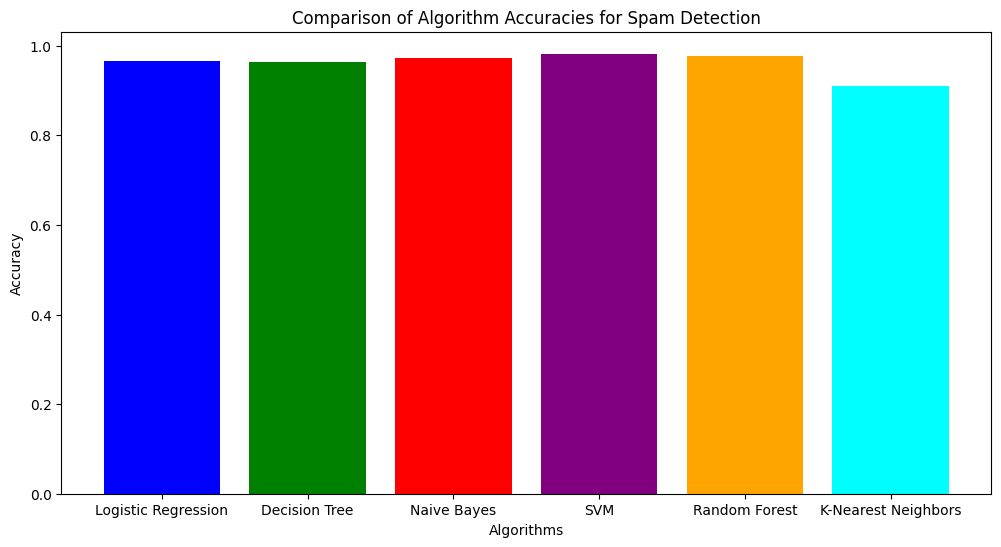

In [26]:
# Plotting the accuracies
algorithms = ['Logistic Regression', 'Decision Tree', 'Naive Bayes', 'SVM', 'Random Forest', 'K-Nearest Neighbors']
accuracies = [logistic_test_accuracy, tree_test_accuracy, nb_test_accuracy, svm_test_accuracy, rf_test_accuracy, knn_test_accuracy]

plt.figure(figsize=(12, 6))
plt.bar(algorithms, accuracies, color=['blue', 'green', 'red', 'purple', 'orange', 'cyan'])
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.title('Comparison of Algorithm Accuracies for Spam Detection')
plt.show()

In [27]:
# Confusion Matrix and Classification Report for SVM
print("SVM Confusion Matrix:")
print(confusion_matrix(Y_test, svm_model.predict(X_test_features)))
print("\nSVM Classification Report:")
print(classification_report(Y_test, svm_model.predict(X_test_features)))

# Confusion Matrix and Classification Report for Random Forest
print("Random Forest Confusion Matrix:")
print(confusion_matrix(Y_test, rf_model.predict(X_test_features)))
print("\nRandom Forest Classification Report:")
print(classification_report(Y_test, rf_model.predict(X_test_features)))


SVM Confusion Matrix:
[[136  19]
 [  1 959]]

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.88      0.93       155
           1       0.98      1.00      0.99       960

    accuracy                           0.98      1115
   macro avg       0.99      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115

Random Forest Confusion Matrix:
[[129  26]
 [  0 960]]

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.83      0.91       155
           1       0.97      1.00      0.99       960

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



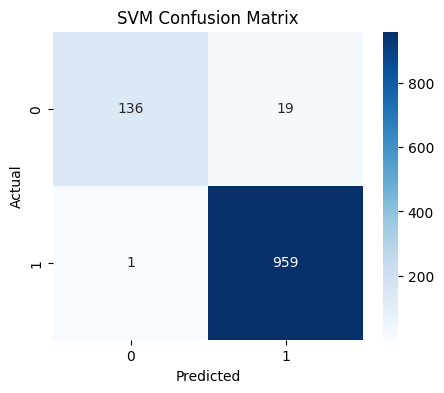

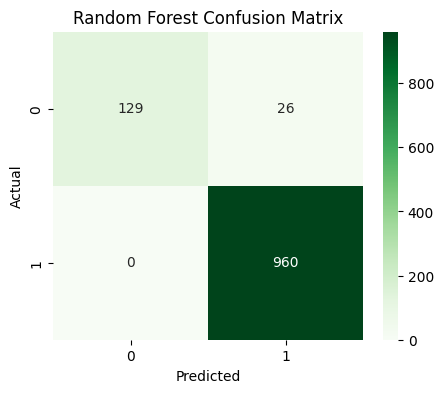

In [28]:
import seaborn as sns

# SVM Confusion Matrix Visualization
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(Y_test, svm_model.predict(X_test_features)), annot=True, fmt="d", cmap="Blues")
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Random Forest Confusion Matrix Visualization
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(Y_test, rf_model.predict(X_test_features)), annot=True, fmt="d", cmap="Greens")
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
